<font size=6>**Machine Learning Practices - Protocols**</font>

    or: "How I Learned to Stop Worrying and Love the Black Box"

In this session we will focus on the fundamentals of the **Machine Learning** (**ML**) approach $-$ We will:<br>

- formalize some **concepts** encountered in previous classes
- outline procedural **protocols**
- highlight **good practises** and common **mistakes**

$\rightarrow$ The target is to understand <u>how to operate</u> "the black box" and make it transparent (_to us, not the referee :p_).

# The Black Box problem

_One step back $-$ what is **Machine Learning**?_
<br>
> A branch of _Artificial Intelligence_ (_AI_) which regards algorithms that can <u>improve their performance through experience and data</u>.

<table><tr>
    <td width=640>
        <img src="images/ML_AI.png">
        <center>
            <br>
            Figure 0.  The ML landscape.
            <br>
            (From <a href="https://www.researchgate.net/figure/Relationship-between-artificial-intelligence-AI-machine-learning-ML-and-deep_fig1_338083201">here</a>)
        </center>
    </td>
</tr></table>

ML can be best understood when compared to the **traditional** approach:

<table><tr>
    <td width=640>
        <img src="images/traditional_vs_ML.png">
        <center>
            <br>
            Figure 1.1.  The traditional approach (<i>top</i>) compared to the ML one (<i>bottom</i>).
            <br>
            (From <a href="https://github.com/ageron/handson-ml2">Gerone, A. "<i>Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow</i>"</a>)
        </center>
    </td>
</tr></table>

Differently from the hard-coded approaches followed by traditional modelling, ML proposes a **train-application** scheme.

The idea is that:
- a machine (a computer) can learn the **parameters** of an arbitrarily complex model by **training** over some input **data**
- the "**Analize errors**" task is performed by the machine itself
- once the model is trained, the machine can predict the response for previously **unseen data**.

- - -

Hence, the **Black Box problem** arises:

> _"We will <u>always</u> get an output, but is that correct?"_

$\rightarrow$ In order to evaluate our "box" we need to have:
- complete control over **inputs** and **outputs**
- a solid **assessement** protocol

_This brings us to ..._

## Basic ingredients for a successful ML model

1. **Metrics of performance (_previous notebooks_)**
    > _"Wait $-$ is this a bug or a feature?"_

3. **Know your data (_this notebook_)**<br>
    > _"garbage in, garbage out"_<br>
    > _~literally any wannabe data analyst on youtube_

3. **Protocols: training, validation, and test sets (_this & next notebook_)**
    > _"Divide [train de probatio] et impera"_

# Data Pre-processing

## Data visualization

When possible, let's **see** the data (or at least their **statistical properties**).

We will generate and observe some mock data with `sklearn.datasets.make_classification`:
- very useful tool to **quickly test** your algos!
- can set **properties** as the number of _samples_ and _features_, of the _informative_ and _redundant_ features, etc.

In [1]:
from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=100, n_features=3, n_informative=1,
                           n_redundant=1, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(10))

+-------------------+
|     Data shape    |
+----------+--------+
|    X     |   y    |
+----------+--------+
| (100, 3) | (100,) |
+----------+--------+


,X0,X1,X2,y
0,0.452936,0.822647,-1.082046,0.0
1,1.405205,0.615728,-0.809881,0.0
2,0.878674,-0.723488,0.951621,1.0
3,1.209382,-0.721496,0.949001,1.0
4,1.403959,0.730866,-0.961326,0.0
5,-0.205867,-0.922984,1.214023,1.0
6,0.102348,0.702073,-0.923454,0.0
7,-0.963016,-1.101895,1.449348,1.0
8,1.043861,0.702422,-0.923913,0.0
9,0.041980,-0.373470,0.491234,1.0


### Quick visualization: corner plot with seaborn

`Seaborn` is a powerful tool for quick visualizations.
- Deals **automatically** with plot limits etc.
- **Wide range** of pre-set visualizations: _corner plots_, _violin plots_, etc.
- Needs `pandas.DataFrames` as inputs

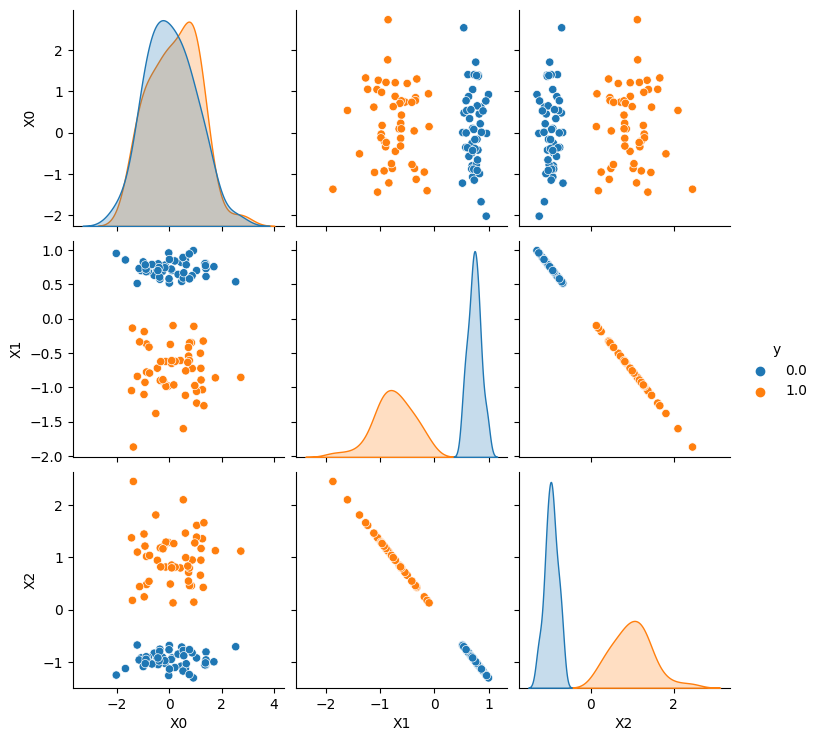

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corner plot:
sns.pairplot(df_data, hue="y")
plt.show()

Which features are:
- redundant?
- informative?

<details>
<summary><b>[Spoiler]</b></summary>
We just need X$_{1}$ or X$_{2}$ for the classification of these data!
</details>

_Sounds familiar?_

### In-class Exercise: Critical look at data visualization [5 mins]

**Objective**: Determine feature importance in the given classification problem.

**Task**: Observe the data distribution, and "predict" which feature will yiled the most information.  Discuss with your teammate whether a feature is redundant or uninformative, and whether it might be dropped altogether.

**Dataset**: EQW data from the [Clustering](https://github.com/astrostatistics-in-crete/2023_summer_school/tree/main/07_ML_Intro_and_Clustering) notebook.

<table><tr>
    <td width=640>
        <img src="images/EQW.png">
    </td>
</tr></table>

## Visualizing high-dimensional data

As you can imagine, _visualizing multidimensonal data_ / _feature selection_ becomes quickly **untractable** as the number of features grows.

> _How can we get an hint of, e.g. **outliers** and source **clustering**?_

We can use tools that "summarize" the features into a lower-dimensional space (**embedding**)<br>
&emsp; $\rightarrow$ _e.g., reduce to 2D or 3D, to directly visualize the data._<br>

These techniques belong to the category of "**Dimensionality Reduction**".

### Dimensionality reduction $-$ PCA

Let's build an "easy" dataset with lots of features ...

In [3]:
from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=500, n_features=1000, n_informative=900,
                           n_redundant=100, n_repeated=0, n_classes=5,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=3.5, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)
# NOTE: <class_sep> sets how far apart are the clusters: larger values produce
#       easier sets, in the sense that they are more easily separable.

classes = np.unique(y)
print('There are %s classes' % len(classes))

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(5))

There are 5 classes
+----------------------+
|      Data shape      |
+-------------+--------+
|      X      |   y    |
+-------------+--------+
| (500, 1000) | (500,) |
+-------------+--------+


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X991,X992,X993,X994,X995,X996,X997,X998,X999,y
0,18.753347,31.753260,-23.650627,2.548072,8.596686,-28.583579,-5.314859,-6.037114,-16.426748,-22.057305,...,-5.155589,-4.458143,-12.913754,-10.303402,-30.848639,-4.378772,22.150511,12.411964,24.501223,3.0
1,25.935355,-19.217451,-11.399226,28.575180,-17.608636,12.687028,-4.723969,-4.807085,23.575929,3.719409,...,-12.709985,10.751886,36.817989,-28.951017,4.325479,6.135593,-6.864087,31.681151,-1.874406,2.0
2,2.239870,-9.187079,-21.562868,26.322170,3.507609,15.572349,-9.216051,-28.939832,-19.987572,12.663714,...,-13.948363,7.686522,20.842364,13.410973,-7.551833,-12.519048,-0.113958,19.139121,9.891073,0.0
3,13.170427,-24.080826,-15.317783,-4.634731,41.287431,-23.983270,-12.227098,-7.898186,-0.069511,-23.165332,...,-0.546686,20.171837,35.421932,-9.020447,24.416009,16.076251,7.452972,26.310219,-1.472834,3.0
4,19.356013,-9.309052,-2.729439,39.078334,24.691922,-24.663333,16.155363,1.181659,-21.635670,3.222789,...,5.416728,-10.170283,-18.654535,-22.473894,-4.623094,4.632362,22.772126,-13.357902,-15.573176,1.0


<font size=3><u>**What is PCA?**</u><font>
    
**_Principal Component Analysis_** (**PCA**) is an unsupervised method which finds the directions (**Principal Components; PCs**) which maximize the variance of the data.

<table><tr>
    <td width=1024>
        <img src="images/PCA.png">
        <center>
            <br>
            Figure 2.2.  Detection of Principal Components ($b$) and reduction of dimensionality from 3D to 2D  ($c$).
            <br>
            (From <a href="https://www.davidzeleny.net/anadat-r/doku.php/en:pca">here</a>)
        </center>
    </td>
</tr></table>

<font size=3><u>**Algorithm**</u><font>

The algorithm essentially works by **diagonalizing** at the **covariance matrix** (this automatically yields the Principal Components):

$$ C_X = {1 \over n} XX^T$$

<u>NOTE:</u> It turns out that the covariance matrix eigenvalues and eigenvectors represent:
    
> **eigenvectors** $\leftrightarrow$ unit array giving the direction of the PC
>
> **eigenvalues** $~\leftrightarrow$ lenght of the PC vector == explained variance along that PC    
    
$\triangleright$ _Consult [Shlens, 2014](https://arxiv.org/abs/1404.1100) for the derivation of the PCs._

- - -

<u>IMPORTANT:</u> We <u>must</u> first normalize the features or else the ones with the largest _dynamic range_ will dominate (_i.e., artificially display the largest variace_)!<br>

In [4]:
from sklearn.preprocessing import StandardScaler
X_n = StandardScaler().fit_transform(X) 

Good, now we can apply the PCA decomposition:

In [5]:
%%time
# ^This is here to show how fast PCA is!
from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit(X_n).transform(X_n)
'''
NOTE: The "embedding" is the new feature matrix, i.e. the original features
      once projected on the orthogonal base composed by the PCs.
''';

table = PrettyTable()
table.title = str('Embedding shape')
table.field_names = ['Dimensions']
table.add_row([np.shape(embedding)])
print(table)

+-----------------+
| Embedding shape |
+-----------------+
|    Dimensions   |
+-----------------+
|    (500, 500)   |
+-----------------+
CPU times: user 857 ms, sys: 412 ms, total: 1.27 s
Wall time: 323 ms


<u>NOTE 1:</u> The _embedding_ has dimensions of:

    (n_samples, n_PCs)
      
<u>BUT:</u> You _cannot_ have more PCs than original features or samples (see e.g. [Shlens, 2014](https://arxiv.org/abs/1404.1100)):
    
    n_PCs == min(n_samples, n_features)

- - -

Let's **display** the first 2 dimensions of our embedding:    

In [6]:
from matplotlib import pyplot as plt
from sklearn import preprocessing

def plot_pca(pca, embedding, y=None, PC_idxs=[0, 1], xlims=[], ylims=[]):
    '''
    Plots the first 2 Principal Components (PCs) projections, along with PC
    importance.
    
    Parameters
    ----------
    pca : sklearn.decomposition.PCA
        A trained PCA object.
    embedding  : np.array
        The data embeddings.
    y : np.array (optional)
        The embedding labels.
    PCs_n : list (optional)
        The indexes of the two PCs to be plotted.
    '''
    fontsize_first  = 16
    fontsize_second = 12

    if y is None: y = np.zeros(len(embedding))

    # Checking whether we are using linear PCA, to plot explained variance:
    if 'kernel' in pca.__dict__.keys():
        kernel  = pca.kernel
    else:
        kernel = None
        
    # Encoding labels in case they are categorical:
    le = preprocessing.LabelEncoder()
    y_e = le.fit_transform(y.ravel()).flatten()
    
    classes = le.classes_

    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    axes[0].set_title('Data embedded via PCA', fontsize=fontsize_first)
    axes[0].set_xlabel('PC'+str(PC_idxs[0]+1), fontsize=fontsize_second)
    axes[0].set_ylabel('PC'+str(PC_idxs[1]+1), fontsize=fontsize_second)
    img = axes[0].scatter(embedding[:, PC_idxs[0]], embedding[:, PC_idxs[1]],
                          s=20, c=y_e, cmap='tab20b', alpha=0.8)
    cbar = plt.colorbar(img, boundaries=np.arange(len(classes)+1)-0.5, ax=axes[0])
    cbar.set_ticks(np.arange(len(classes)))
    cbar.set_ticklabels(classes)
    
    if xlims: axes[0].set_xlim(xlims)
    if ylims: axes[0].set_ylim(ylims)

    if kernel is not None:
        axes[1].axis('off')
    else:
        ax2 = axes[1].twinx()
        axes[1].set_title('PC importance', fontsize=fontsize_first)
        axes[1].set_xlabel('PC index', fontsize=fontsize_second)
        axes[1].set_ylabel('Explained variance [%]', fontsize=fontsize_second)
        ax2.set_ylabel('Explained variance (cumulative) [%]', fontsize=fontsize_second, color='crimson')
        axes[1].bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_*100, width=0.8)
        ax2.plot(np.cumsum(pca.explained_variance_ratio_)*100, color='crimson')

    plt.show()

And here is how our 100-dimensional data look like when embedded in 2D:

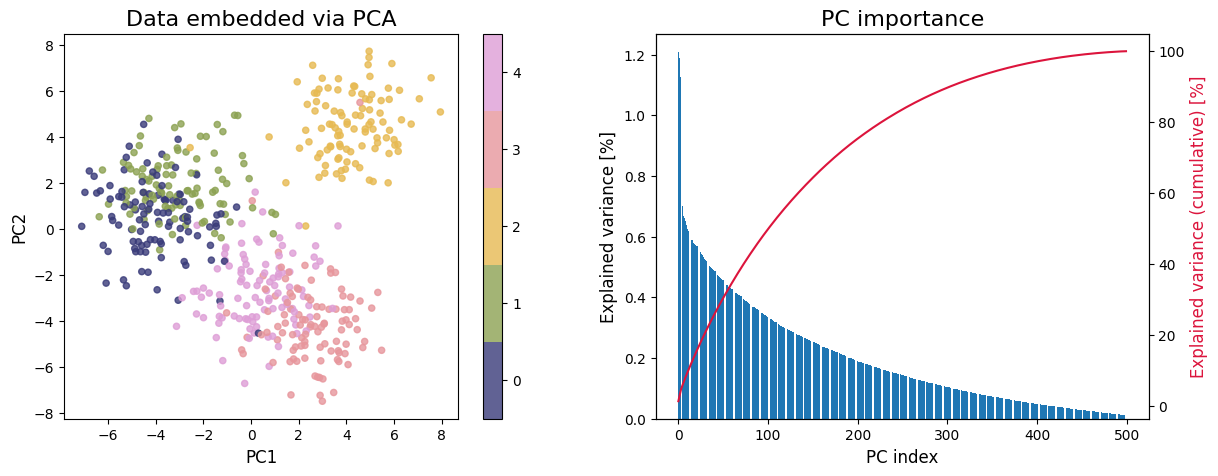

In [7]:
plot_pca(pca, embedding, y=y)

The beauty is $-$ the PCs are **sorted** by importance!

We can look at the Explained variance and decide ow many to keep!<br>
_E.g. the first **k** components that together explain 50% of the variance_

<u>MPORTANT:</u> **We didn't use the labels** to perform PCA $-$ those were added later, in the visualization!

<font size=3><u>**Physical intuition**</u><font>
    
Imagine you have a system which has an _intrinsic_ direction of movement:

<table><tr>
    <td width=500>
        <img src="images/PCA_intuition.png">
        <center>
            <br>
            Figure 2.3. A poorly-chosen set of features which could benefit from PCA to find the underlying direction of motion.
            <br>
            (From <a href="https://arxiv.org/pdf/1404.1100.pdf">here</a>)<br>
        </center>
    </td>
</tr></table>

The X, Y, and Z variables **are correlated** by the motion along the spring axis.

$\rightarrow$ PCA might help us bypass the issue!

### In-class Exercise: Run your own PCA [15 mins]

**Objective**: Let's assume we want to have a snapshot of our data, see if the data clusters in any way.

**Task**: You will have to apply PCA to the dataset (restricted to a few numerical values), project into the first two PCs, and identify the clusters (by eye). 

**Dataset**: We will use a dataset of galaxy images, the [Galaxy10 DECals Dataset](https://astronn.readthedocs.io/en/latest/galaxy10.html), nicely packaged into a dataframe.

Data type: images (21785 images)

Classes<br>
├── Class 0 (3461 images): Disk, Face-on, No Spiral<br>
├── Class 1 (6997 images): Smooth, Completely round<br>
├── Class 2 (6292 images): Smooth, in-between round<br>
├── Class 3 (394 images): Smooth, Cigar shaped<br>
├── Class 4 (1534 images): Disk, Edge-on, Rounded Bulge<br>
├── Class 5 (17 images): Disk, Edge-on, Boxy Bulge<br>
├── Class 6 (589 images): Disk, Edge-on, No Bulge<br>
├── Class 7 (1121 images): Disk, Face-on, Tight Spiral<br>
├── Class 8 (906 images): Disk, Face-on, Medium Spiral<br>
└── Class 9 (519 images): Disk, Face-on, Loose Spiral<br>

Current path: /data/schools/Astrostatistics_School_Crete_2023/2023_summer_school/09_ML_Practices


There are 9 classes
Image array shape: (21768, 69, 69, 3)



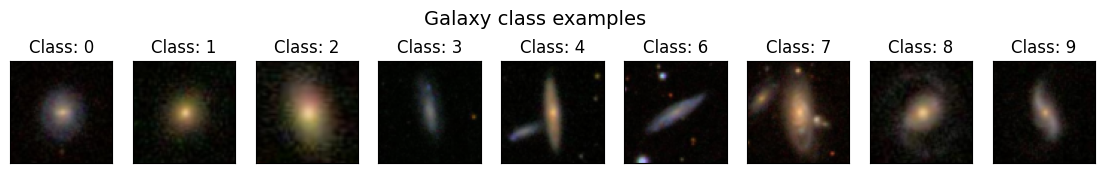

Original shape of the images: (n_x = 69, n_y = 69, n_colors = 3)


CPU times: user 4.33 s, sys: 398 ms, total: 4.72 s
Wall time: 4.75 s


In [8]:
%%time

import os
import ssl
import wget

from pathlib import Path
script_path = str(Path().absolute())
print('Current path: %s\n\n' % script_path)

path_data = script_path + '/data'

# Downloading if dataset not found:
if not os.path.isfile(path_data+"/Galaxy10.h5"):
    print('Downloading data [might take a few mins]')
    url = "http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5"
    ssl._create_default_https_context = ssl._create_unverified_context
    _ = wget.download(url, out=path_data)
    print('\n\n')


# Loading catalogue:
import h5py
import numpy as np
import pandas as pd
from prettytable import PrettyTable

with h5py.File(path_data+"/Galaxy10.h5", "r") as F:
    images = np.array(F["images"])
    labels = np.array(F["ans"])
    
# Dropping class 5, which only has 17 galaxies:
idxs_valid = np.where(labels != 5)[0]
images = images[idxs_valid]
labels = labels[idxs_valid]

# Keeping only 1 color:
#images = images[:,:,:,0]
#images = images[..., np.newaxis]

classes = sorted(np.unique(labels))
print('There are %s classes' % len(classes))

print('Image array shape: %s\n' % str(np.shape(images)))

# Displaying one image for each class:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, len(classes), figsize=(14, 5))
plt.suptitle('Galaxy class examples', y=0.7, fontsize=14)

for i, class_ in enumerate(classes):
    idx = np.where(labels == class_)[0][0]
    # index of first galaxy in the list, for class <classs>
    ax = axes[i]
    ax.set_title('Class: %s' % class_)
    ax.imshow(images[idx])
    plt.setp(ax, xticks=[], yticks=[])
plt.show()

# Grabbing image properties:
n_y, n_x, n_colors = np.shape(images)[1], np.shape(images)[2], np.shape(images)[3]
# NOTE: Image dimensions are always transposed, when represented as matrices!
print('Original shape of the images: (n_x = %s, n_y = %s, n_colors = %s)\n\n' %\
      (n_x, n_y, n_colors))

Let's "**flatten**" the dataset, so we can use it in `sklearn`:
    
    1 row == 1 image
    1 pixel == 1 feature
    
<table><tr>
    <td width=500>
        <img src="images/Flattened_Image.png">
        <center>
            <br>
            Figure 2.4. Re-arrangement of pixels into features to "<i>flatten</i>" an image.
        </center>
    </td>
</tr></table>    

In [9]:
%%time

# Flattening images to 1D arrays (and casting to float):
X_ = images.reshape([len(images), np.shape(images)[1]*np.shape(images)[2]*np.shape(images)[3]])
X_ = X_.astype(np.float32)
# TRICK: These are RGB images (integer values 0--256): we can convert to a
#        low-encoding float (32 instead of e.g. 64 bits) without losing information.

feature_names = ["pixel"+str(i) for i in range(np.shape(X_)[1])]

# Converting data to dataframe:
df_data_orig = pd.DataFrame(data=np.append(X_, labels[:,None],1), columns=feature_names+['y'])

# Balancing classes using pandas:
#
# For each class, keeping as many objects as for the class with min number
# of objects ...
df_data_g = df_data_orig.groupby('y')
df_data = pd.DataFrame(df_data_g.apply(lambda x: x.sample(df_data_g.size().min()).reset_index(drop=True)))
# Keeping only class of galaxies to better understand the PCs:
# df_data = df_data.loc[df_data['y'] ==7]
# Re-exctracting the matrices after rebalancing ...
X = df_data[feature_names].values
y = df_data['y'].values

# Normalizing the total flux of each image to 1:
# (to highlight morphological differences over luminosity)
#X = X / X.sum(axis=1, keepdims=1)

print('Each class contains ~%s galaxies' % int(round(len(y)/len(classes))))

# Keeping only a [random] subset of the data to speed up calculations:
n_samples_keep = 1000 # max: len(X)
idxs_keep = np.random.randint(len(X), size=n_samples_keep)
X = X[idxs_keep]
y = y[idxs_keep]

# Displaying first 5 rows:
display(df_data.head(5))

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

Each class contains ~349 galaxies


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
y                                                                               
0.0 0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0   
    1    11.0     2.0     3.0    18.0    12.0    12.0    27.0    21.0    21.0   
    2     7.0     6.0     4.0     5.0     4.0     2.0     2.0     1.0     0.0   
    3     1.0     1.0     1.0     2.0     2.0     2.0     1.0     1.0     1.0   
    4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel14274  pixel14275  pixel14276  pixel14277  \
y              ...                                                   
0.0 0     2.0  ...         4.0         6.0         3.0         6.0   
    1    19.0  ...        10.0        12.0         9.0         6.0   
    2     1.0  ...         3.0         3.0         1.0         3.0   
    3     0.0  ...         4.0         2.0         3.0         3.0   
    4     2.0  ...         1.0         3.0         0.0         3.0   

       pixel14278  pixel14279  pixel14280  pixel14281  pixel14282    y  
y                                                                       
0.0 0         8.0         5.0         5.0         7.0         4.0  0.0  
    1         8.0         5.0         1.0         3.0         0.0  0.0  
    2         3.0         1.0         3.0         3.0         1.0  0.0  
    3         1.0         2.0         2.0         0.0         1.0  0.0  
    4         5.0         2.0         9.0        11.0         8.0  0.0  

[5 rows x 14284 columns]

+-------------------------+
|        Data shape       |
+---------------+---------+
|       X       |    y    |
+---------------+---------+
| (1000, 14283) | (1000,) |
+---------------+---------+
CPU times: user 573 ms, sys: 441 ms, total: 1.01 s
Wall time: 1.02 s


<hr style='height:1px'>

_Our solution_

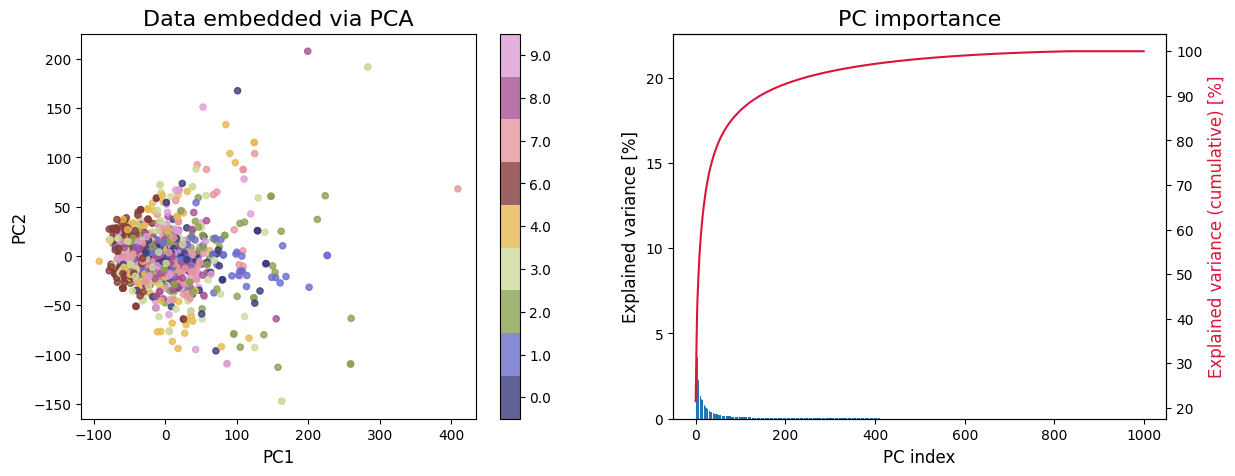

CPU times: user 17.5 s, sys: 6.74 s, total: 24.2 s
Wall time: 5.01 s


In [10]:
%%time
from sklearn.preprocessing import StandardScaler
X_n = StandardScaler().fit_transform(X) 

from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit(X_n).transform(X_n)

plot_pca(pca, embedding, y=y)

Mh, not a perfect class separation. If only it existed a **_non_-linear** PCA ...

<hr style='height:1px'>

### Kernel PCA

PCA can use the **kernel trick** (just like in `SVM`)<br>
&emsp; $\rightarrow$ **Kernelization** applies non-linear transformations to the data, then performs PCA in the transformed space. 

How? $-$ <u>Intuition</u>

The covariance matrix contain the multiplication of the data vectors among themselves:

$$ C_X = {1 \over n} XX^T $$

Now, you can imagine that if use a trasformation $\Phi(.)$ to trasform the data to a new "**feature space**":

$$ X \rightarrow \Phi(X)$$

... in such feature space the covariance matrix will be composed of dot products of the type:

$$~\langle \Phi(X_i), \Phi(X_j)~\rangle$$

where $i$, $j$ are different samples.  
The kernel trick allows us to express this as:

$$~\langle \Phi(X_i), \Phi(X_j)~\rangle = K({X_i, X_j}) $$

- - -

<u>NOTE:</u> 

We <u>don't</u> define $\Phi(.)$ and _then_ find the associated $K(.,.)$.

On the contrary, we adopt a $K(.,.)$, and _assume_ there exists an associated $\Phi(.)$ (_which we never use anyways_).

$\rightarrow$ in principle, $\Phi(X)$ may belong to $\mathbb{R}^\infty$

- - -

E.g., **R**adial **B**asis **F**unction (**rbf**) kernel:
> $$K({X_i, X_j}) = exp\big({|| X_i - X_j ||^2 \over \gamma^2}\big)$$

E.g., **Cosine** kernel:
> $$K({X_i, X_j}) = { X_i X_j^T \over ||X_i||~||X_j||}$$

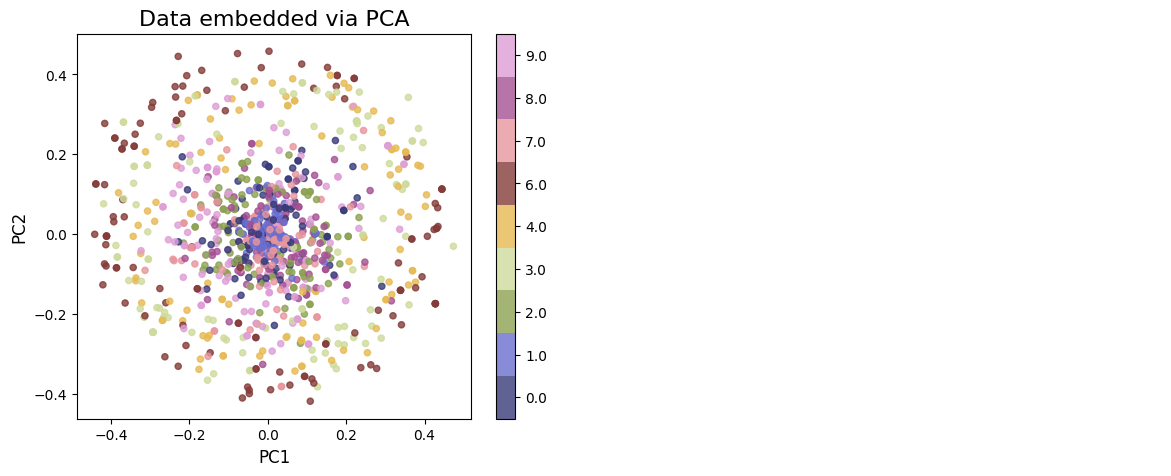

CPU times: user 2.53 s, sys: 1.18 s, total: 3.71 s
Wall time: 684 ms


In [11]:
%%time
from sklearn.decomposition import KernelPCA

# Try one of these kernels:
#kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=1)
#kernel_pca = KernelPCA(n_components=2, kernel="poly", degree=3)
kernel_pca = KernelPCA(n_components=2, kernel="cosine")
#kernel_pca = KernelPCA(n_components=2, kernel="sigmoid", coef0=1.5)

embedding = kernel_pca.fit(X).transform(X)
# NOTE: Kernel PCA normalizes internally (we can pass `X` directly)

plot_pca(kernel_pca, embedding, y=y)

<u>SUMMARY:</u> Real data are **tough**, usually we cannot easily spot clusters ...

<table><tr>
    <td width=640>
        <img src="images/MITM.jpg">
    </td>
</tr></table>


<u>MPORTANT:</u> The result is _strongly dependent_ on the **hyperparameters**!
(_e.g., try with `kernel`='poly' and vary `degree`_)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\rightarrow$ In kernel PCA, the embedding space is _not_ interpretable.

##  In-class Exercise: Eigen-galaxies!

**Objective**: Let's now try and <u>visualize the Principal Components</u>!

**Dataset**: The [Galaxy10 DECals Dataset](https://astronn.readthedocs.io/en/latest/galaxy10.html).

First of all, let's perform the _linear_ PCA decomposition as usual ...

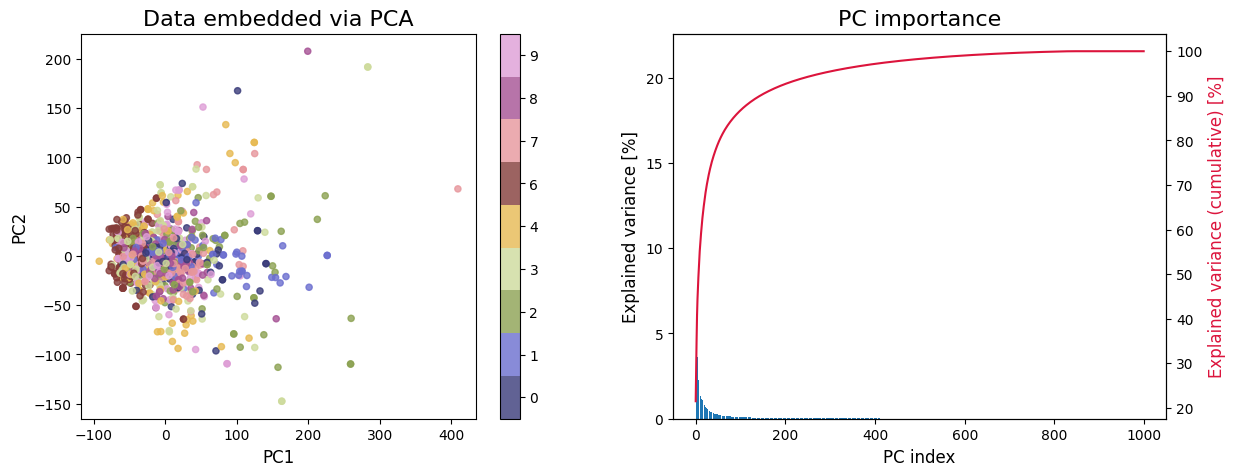

CPU times: user 13.2 s, sys: 2.61 s, total: 15.8 s
Wall time: 3.41 s


In [12]:
%%time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_n = scaler.fit_transform(X) 

from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit_transform(X_n)

plot_pca(pca, embedding, y=y.astype(int))

The vector representing Principal Component $i$ (**PC_i**) is given by:

        PC_i = eigenvector_i x eigenvalue_i


The `sklearn` PCA stores the **eigenvectors** (== _unit array giving the direction of the PC_) in:

> `pca.components_`
    
and the **eigenvalues** (== _lenght of the PC vector_) in:

> `pca.explained_variance_`


**Part 1 [2 mins]:**


**Task 1**: Each entry in `pca.components_` is 1 eigenvector. Try to print one, just to see its content.

<hr style='height:1px'>

_Our solution_

In [13]:
print('The first eigenvector is:')
print(pca.components_[0])
print('... it has %s dimensions ...' % len(pca.components_[0]))
print('... and its eigenvalue is: %s' % pca.explained_variance_[0])

The first eigenvector is:
[0.00179094 0.00144048 0.00127094 ... 0.00332041 0.00322013 0.00200617]
... it has 14283 dimensions ...
... and its eigenvalue is: 3073.7832


**Part 2 [10 mins]**:

Let's now plot the first 10 PCs.

Yeah, we call them 'vectors', but they are _actually_ **images**, sooooo ... we shall reshape them from 1D to (`n_x`, `n_y`, `n_colors`), to plot them right.

**Task 2**: Define PC$_i$ and resize it appropriately, from array to image.

In [ ]:
n_eigenvectors_to_plot = 10

fig = plt.figure(figsize=(16, 6))
for i in range(n_eigenvectors_to_plot):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    
    PC_i = ...
    # PC_i == eigenvector_i * eigenvalue_i

    # Scaling to [0, 1] for visualization purposes:
    PC_i = MinMaxScaler().fit_transform(PC_i.reshape(-1,1))

    ax.set_title('Eigen-galaxy %i' % i)
    ax.imshow(PC_i.reshape(n_x, n_y, n_colors),
              cmap=plt.cm.bone)

<hr style='height:2px'>

_Our solution_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


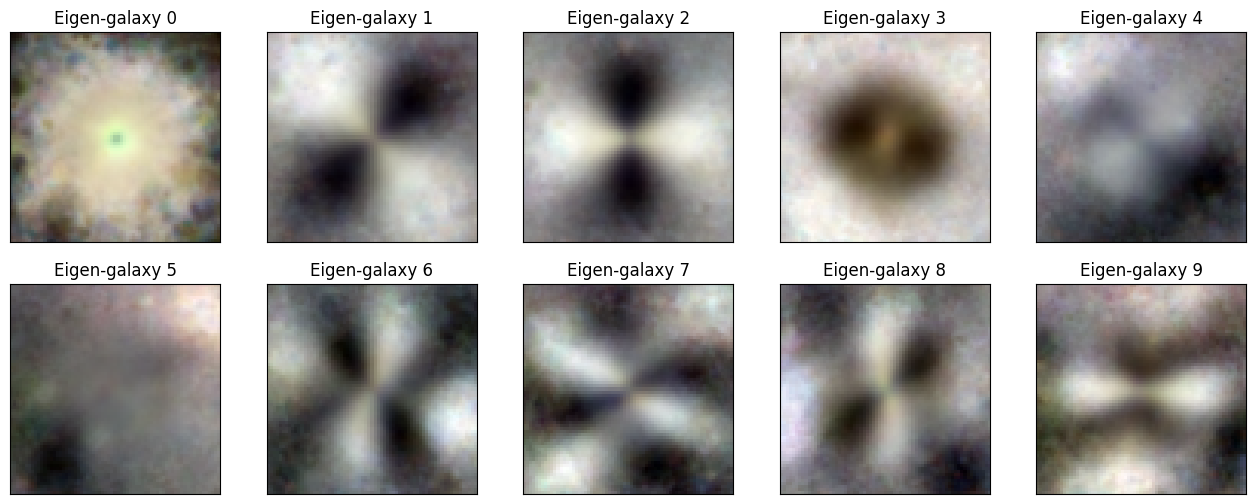

In [14]:
from sklearn.preprocessing import MinMaxScaler

n_eigenvectors_to_plot = 10

fig = plt.figure(figsize=(16, 6))
for i in range(n_eigenvectors_to_plot):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    
    PC_i = pca.components_[i] * pca.explained_variance_[i]
    # PC_i == eigenvector_i * eigenvalue_i
    
    # Scaling to [0, 1] for visualization purposes:
    PC_i = MinMaxScaler().fit_transform(PC_i.reshape(-1,1))

    ax.set_title('Eigen-galaxy %i' % i)
    ax.imshow(PC_i.reshape(n_x, n_y, n_colors),
              cmap=plt.cm.bone)

$\rightarrow$ We can think of PCs as the _basic_ "**ingredients**" composing a galaxy.<br>
_&emsp; - PC1 maps a the intensity scale_<br>
_&emsp; - subsequent PCs map finer and finer morphological details_

The "**recipe**" to obtain galaxy _XYZ_ is to mix the ingredients using the "**dosage**" given by the _embedding values_.

- - -

More generally, PCA **decomposition** allows to break data along its _significant_ components.

## Scaling features

<u>NOTE</u>: "Scaling" shall be interpreted as a generic form of **normalization**.

### When do you need to normalize?

- Normalizing is <u>fundamental</u> when adopting algorithms that make use of **distance**.

    _Example: **SVM**, **$k$NN**, or some **hierarchical clustering**_<br>
    $k$NN Measures the distance between a _test_ point $\hat{X}$ and all the _training_ points $X_i$: e.g. || $\hat{X}$ -  ${X_i}$ ||$^2$
  
  
- Normalizing is <u>fundamental</u> when adopting algorithms that **compare** the contribution of **features**.

     _Example: **PCA**_<br>
     PCA requires to scale and center features around 0 [$\S$Feature reduction](#Feature-reduction)


- Normalizing <u>is not necessary</u> with algorithms which look at each feature **independently**

    _Example: **Random Forests**_<br>

<br>

... However, normalizing features is usually a good habit because:

- Scaling <u>helps</u> convergence when features have very different **dynamic ranges**.
 
    _Example: algorithms using **gradient descent** (including **neural networks**)_<br>



<font size=3><u>**Example**</u><font>

Let's try to see what happens to the accuracy when we try a $k$NN classifier **with** and **without** normalizing.
    
> 3 classes, 2 features.

Accuracy on non-normalized data: 0.59
Accuracy on normalized data: 0.66


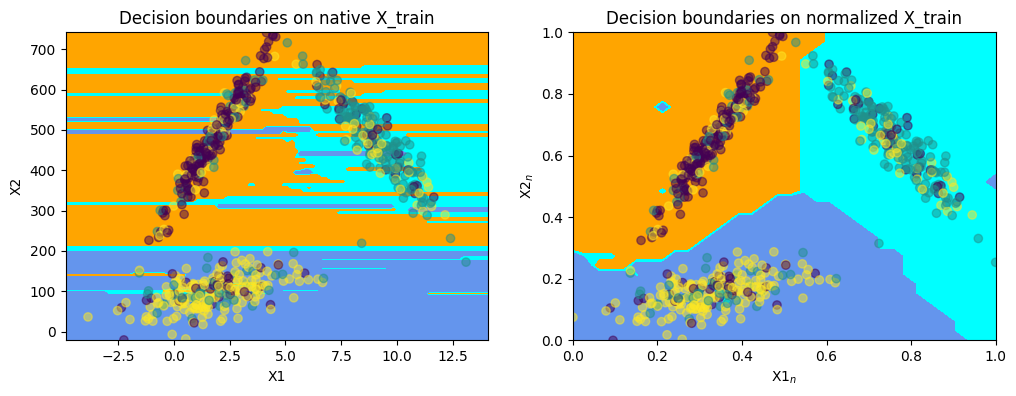

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Let's create the usual mock data:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2, flip_y=0.5,
                           shift=3, scale=None, random_state=42)
# NOTE1: We set "scale" to "None" to generate randomly scale features!
# NOTE2: flip_y=0.5 makes the classification more difficult!

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

# Let's fit directly:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Accuracy on non-normalized data: %.2f' % clf.score(X_test, y_test))

# Now, let's normalize with respect to the max of each feature, and re-fit:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n  = scaler.transform(X_test)

clf_n = KNeighborsClassifier(n_neighbors=10)
clf_n.fit(X_train_n, y_train)

print('Accuracy on normalized data: %.2f' % clf_n.score(X_test_n, y_test))

# Plotting decision boundaries:
# See:
#    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

fig, axes = plt.subplots(1, 2, figsize=(12,4))
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

DecisionBoundaryDisplay.from_estimator(
    clf, X_train, cmap=cmap_light, ax=axes[0], response_method="auto")

axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5)

DecisionBoundaryDisplay.from_estimator(
    clf_n, X_train_n, cmap=cmap_light, ax=axes[1], response_method="auto")

axes[1].scatter(X_train_n[:,0], X_train_n[:,1], c=y_train, alpha=0.5)

axes[0].set_title('Decision boundaries on native X_train')
axes[1].set_title('Decision boundaries on normalized X_train')

axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[1].set_xlabel('X1$_n$')
axes[1].set_ylabel('X2$_n$')

axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.show()

### Types of scalers

Theoretically, infinite.

The <code>sklearn</code> library implements several scalers:
- check this [showcase of <code>sklearn</code>scalers](https://scikit-learn.org/stable/modules/preprocessing.html) 
- check the [effects of different scalers on outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) for their effects on oultiers

<table><tr>
    <td width=1600>
        <img src="images/Scalers_Showcase.png">
        <center>
            <br>
            Figure 2.1. A showcase of the effect of different <code>sklearn</code> scalers applied to different distributions.<br>
            (From <a href="https://scikit-learn.org/stable/modules/preprocessing.html">here</a>)
        </center>
    </td>
</tr></table>


<u>Basic transformations</u>

- `MinMax`

$$ X^{\prime} = {X - X_{min} \over X_{max} - X_{min}} $$

- `StandardScaler`

$$ X^{\prime} = {X - <X> \over \sigma_X} $$


- `QuantileTransformer`

        Transforms the values to become a uniform or a normal distribution.

Imports:

    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import QuantileTransformer
    
<u>Remember the golden rule:</u>

    Train on train, apply on test!

## More on Data Pre-processing

Aside from **pre-processing** practices seen here, more exist.

In [2022 Summer School for Astrostatistics in Crete - ML Practices S
](https://github.com/astrostatistics-in-crete/2022_summer_school/blob/main/ML_Practices/ML_Practices_S.ipynb), you will find:

$\triangleright$ **Feature construction**<br>
$\triangleright$ **Feature selection**<br>
  &emsp; &emsp; _sklearn.SelectKBest, Sequential Forward Selection_<br>
$\triangleright$ **Non-linear feature reduction**<br>
  &emsp; &emsp; _t-SNE, UMAP_<br>
$\triangleright$ **Feature encoding**<br>
  &emsp; &emsp; _One Hot Encoding_<br>

- - -

Other techniques regard:  
  
$\triangleright$ **Inputing missing values**<br>
  &emsp; &emsp; _e.g., missingno, MICE and its variants_  $\rightarrow$
  [`missingno`](https://github.com/ResidentMario/missingno),
  [`sklearn.impute.IterativeImputer`](https://scikit-learn.org/stable/modules/impute.html),
  [`miceforest`](https://pypi.org/project/miceforest/)<br>
$\triangleright$ **Dealing with imbalanced classes**<br>
  &emsp; &emsp; _e.g., SMOTE_  $\rightarrow$[`imblearn.over_sampling.SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)<br>
$\triangleright$ **Removing outliers** (?)<br>
$\triangleright$ **Handling numerical exceptions** (zeros, NaNs!)<br>

... and many more!

Have a look at this [post about Data Cleaning](https://towardsdatascience.com/automated-data-cleaning-with-python-94d44d854423) as a starting point! 

# Protocols

> **Protocols** = Correct methodologies to assess out ML model

Let's see a few, in order of complexity.

## Level 0 $-$ Comparing against baseline

> _Which is the minimum achievable score?_

<table><tr>
    <td width=800>
        <img src="images/Goku_Young.png">
    </td>
</tr></table>

Let's consider a simple dataset:

In [16]:
import numpy as np
import pandas as pd

np.random.seed(42)
x1 = np.random.randint(10, size=10)
x2 = np.random.randint(10, 20, size=10)
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
df_data = pd.DataFrame(np.array([x1, x2, y]).T, columns=['x1', 'x2', 'class'])

display(df_data)

,x1,x2,class
0,6,13,0
1,3,17,0
2,7,17,1
3,4,12,0
4,6,15,0
5,9,14,0
6,2,11,0
7,6,17,0
8,7,15,0
9,4,11,0


In [17]:
from sklearn.linear_model import LogisticRegression

X = df_data[['x1','x2']].values
y = df_data[['class']].values.ravel()

clf = LogisticRegression(random_state=42)
clf.fit(X, y)

print('LogisticRegression | accuracy: %.2f' % clf.score(X, y))

LogisticRegression | accuracy: 0.90


How good is this result?

<details>
<summary><b>[Spoiler]</b></summary>    
    
A **Majority Class** classifier, i.e. a _trivial_ classifier which always returns the most frequent class seen in training, would have scored 90% accuracy!

<table><tr>
    <td width=400>
        <img src="images/Yamcha.jpg">
    </td>
</tr></table>
    
</details>

<font size=3><u>**Always compare against dummy estimators!**</u><font>

... or at least keep in mind the minimum achievable score $=$ **baseline**.  Having a comparison reference is <u>very important</u> when publishing, to convince about the goodness of your model.
    
In some cases, the baseline can also be found **theoretically**, it does not matter. 

Some examples of dummy estimators:
    
 - <u>Classification</u>:
   - **Random (Trivial) Classifier**: a classifier which returns a random class
   - **Stratified Classifier**: a classifier which returns a class with a probability following the distribution of classes seen in training
    
    [<code>sklearn</code> Dummy Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
    
        
 - <u>Regression</u>:
   - **Constant Regressor**: a regressor which alwyas returns a value, e.g. the mean ($y_{train}$) or median ($y_{train}$)
    
    [<code>sklearn</code> Dummy Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

... or create your own based on the problem you are addressing!

## Level 1 $-$ Cross Validation (a.k.a. $k$-fold Cross Validation)

> _Am I overfitting the train set?_

<table><tr>
    <td width=800>
        <img src="images/Goku.png">
    </td>
</tr></table>

We have seen the basic **train/[validation]/test** split:

<table><tr>
    <td width=640>
        <img src="images/Train_Test.png">
        <center>
            <br>
            Figure 3.1.  Indicative recipe for splitting a dataset into the train and test sets.
            <br>
        </center>
    </td>
</tr></table>

_Would the results change if we shuffled the data differently?_

<font size=3><u>**Cross Validation**</u><font>

It involves _re-fitting_ the model over different partitionings of the dataset:

<table><tr>
    <td width=800>
        <img src="images/CV_k4.jpg">
        <center>
            <br>
            Figure 3.2.  Data splitting for a Cross Validation with $k = 4$ folds.
        </center>
    </td>
</tr></table>

A **$k$-fold CV** splits the data in $k$ parts (**folds**), and, at each iteration:
   - uses **$k$-1** folds for training
   - uses the **remaining** fold for testing (_although we indistinctively call it **validation** set, in this context_)

The model is tested $k$ times, always on unseen data.

In this way, CV actually tackles 2 issues:

- Assessment of **bias**<br>
  _(i.e. how much the model depends on a specific training set)_

- Exploitation of the **whole dataset**<br>
  _(i.e. all data are eventually used for both training and testing)_

Each model fit produces a performance score, therefore we can obtain both an **average** estimate, and a **uncertainty** on it.

<u>IMPORTANT:</u> While the CV gives performance estimates, the final model shall be **_re_-trained on all** the data.<br>
$~~~~~~~~~~~~~~~~~~~$ We can reasonably assume that the re-trained model will be at least as performing as the CV average.<br>
$~~~~~~~~~~~~~~~~~~~$ (Actually, you shall _re_-fit on all data also when you use the simpler train/validation/test protocol).

- - -

**Q:** What is the right $k$?<br> 
**R:** Common values range between 3 and 10, but depends on:
- how many data we have<br>
- how much time we have<br>

because for larger $k$ we got more estimates, but in exchange we get:

- a smaller test set at each iteration
- more computations


<font size=3><u>**Variants**</u><font>

- **Repeated CV**: CV, but repeated $n$ times with different shuffling

- **Stratified CV**: CV, but the demographics of each fold is representative of the data (e.g. same class demoographics)

### In-class Exercise: Make your own CV [20 mins]

**Objective**: Compare the performance _distributions_ of 2 classifiers.

**Task**: You will have to:

1. Loop over the CV iterations
1. Inside ach iteration:
    - Split the data in _train_ and _validation_
    - Fit both classifiers
    - Assess the accuracy of both classifiers
    - Store the accuracies for the curent iteration
1. Create 2 histograms showing the distributions of accuracies of the classifiers across the iterations.

**Dataset**: We will use  Kaggle's [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17), restricted to just a few magnitudes.<br>
The target of the classification is the object type.

In [18]:
import pandas as pd

df_star = pd.read_csv("data/star_classification.csv")
df_star = df_star.sample(n=1000, random_state=12)
# keeping only a few objects to speed up calculations

features = ['u', 'g', 'r']#, 'i', 'z', 'redshift']
df_star_ = df_star[features+['class']]
print('Dataset for our exercise:')
display(df_star_.head(5))

X = df_star_[features].values
y = df_star_['class'].values

Dataset for our exercise:


,u,g,r,class
23441,22.30567,21.43649,19.75798,GALAXY
90125,17.91316,16.73492,16.57163,STAR
57892,23.00886,22.49020,20.71650,GALAXY
7228,19.80938,17.89119,16.83623,GALAXY
99545,24.32647,23.16088,21.35538,GALAXY


In [19]:
from sklearn.model_selection import KFold

cv = 10
# number of CV folds (change, if you like)

# Splitting the folds:
#   The `KFold` method allows us to directly get the train and test indexes
#   across the iterations, sparing us the tedious index tracking
kf = KFold(n_splits=cv)
kf.get_n_splits(X);

In [ ]:
%%time
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

############################################
# Replace "..." with the appropriate code! #
############################################

# Defining the classifiers of choice:
clf_1 = svm.SVC(kernel='linear', C=5)
clf_2 = RandomForestClassifier()

scores_1 = []
scores_2 = []
# list of scores across the iterations

# CV iterations:
for k, (idxs_train, idxs_valid) in enumerate(kf.split(X)):
    '''
    # `idxs_train` and `idxs_valid` respectively contain the indexes of the
    # train and validation samples for iteration `k`.
    ''';
    
    print('Iteration %s' % (k+1))

    print('\t- Splitting folds')
    X_train = ...
    X_valid = ...
    y_train = ...
    y_valid = ...
    
    print('\t- Fitting on train fold')
    clf_1.fit(..., ...)
    clf_2.fit(..., ...)

    print('\t- Predicting on validation fold')
    yhat_valid_1 = clf_1.predict(...)
    yhat_valid_2 = clf_2.predict(...)
    
    print('\t- Assessing accuracy score and storing')
    score_1 = accuracy_score(..., ...)
    score_2 = accuracy_score(..., ...)
    # NOTE: We could just as well use the `clf.score()` method, but better
    #       to always explicitly specify the score we pick.
    
    scores_1.append(score_1)
    scores_2.append(score_2)

print('Re-fitting on all the available data')    
# NOTE: We don't need it for this exercise, it is just here as a reminder of
#        good practice.
clf_1_final = clf_1.fit(X, y)
clf_2_final = clf_2.fit(X, y)

In [ ]:
############################################
# Replace "..." with the appropriate code! #
############################################

import numpy as np
from matplotlib import pyplot as plt

print('Plotting score distributions and their average values')    

fig = plt.figure(figsize=(8,4))
plt.hist(..., bins=5, color='C0', alpha=0.5)
plt.hist(..., bins=5, color='C1', alpha=0.5)
plt.axvline(x=np.mean(scores_1), ls='--', lw=5, color='steelblue',
            label='clf$_{1}$ (mean)')
plt.axvline(x=np.mean(scores_2), ls='--', lw=5, color='tomato',
            label='clf$_{2}$ (mean)')
plt.xlabel('Accuracy score', fontsize=14)
plt.ylabel('Number density', fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1., 1.))
plt.show()

<hr style='height:1px'>

_Our solution_

In [20]:
%%time
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Defining the classifiers of choice:
clf_1 = svm.SVC(kernel='linear', C=5)
clf_2 = RandomForestClassifier()

scores_1 = []
scores_2 = []
# list of scores across the iterations

# CV iterations:
for k, (idxs_train, idxs_valid) in enumerate(kf.split(X)):
    '''
    # `idxs_train` and `idxs_valid` respectively contain the indexes of the
    # train and validation samples for iteration `k`.
    ''';

    print('Iteration %s' % (k+1))

    print('\t- Splitting folds')
    X_train = X[idxs_train]
    X_valid = X[idxs_valid]
    y_train = y[idxs_train]
    y_valid = y[idxs_valid]
    
    print('\t- Fitting on train fold')
    clf_1.fit(X_train, y_train)
    clf_2.fit(X_train, y_train)

    print('\t- Predicting on validation fold')
    yhat_valid_1 = clf_1.predict(X_valid)
    yhat_valid_2 = clf_2.predict(X_valid)
    
    print('\t- Assessing accuracy score and storing')
    score_1 = accuracy_score(y_valid, yhat_valid_1)
    score_2 = accuracy_score(y_valid, yhat_valid_2)
    # NOTE: We could just as well use the `clf.score()` method, but better
    #       to always explicitly specify the score we pick.
    
    scores_1.append(score_1)
    scores_2.append(score_2)

print('Re-fitting on all the available data')    
# NOTE: We don't need it for this exercise, it is just here as a reminder of
#        good practice.
clf_1_final = clf_1.fit(X, y)
clf_2_final = clf_2.fit(X, y)

Iteration 1
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 2
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 3
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 4
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 5
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 6
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 7
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Assessing accuracy score and storing
Iteration 8
	- Splitting folds
	- Fitting on train fold
	- Predicting on validation fold
	- Asses

Plotting score distributions and their average values


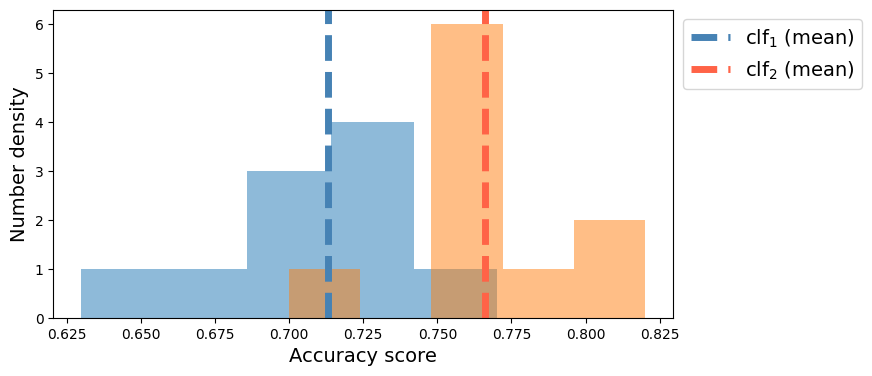

In [21]:
import numpy as np
from matplotlib import pyplot as plt

print('Plotting score distributions and their average values')    

fig = plt.figure(figsize=(8,4))
plt.hist(scores_1, bins=5, color='C0', alpha=0.5)
plt.hist(scores_2, bins=5, color='C1', alpha=0.5)
plt.axvline(x=np.mean(scores_1), ls='--', lw=5, color='steelblue',
            label='clf$_{1}$ (mean)')
plt.axvline(x=np.mean(scores_2), ls='--', lw=5, color='tomato',
            label='clf$_{2}$ (mean)')
plt.xlabel('Accuracy score', fontsize=14)
plt.ylabel('Number density', fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1., 1.))
plt.show()

**<font size=5>Ah!</font> As you can see, the result _does_ depend on the split!**

Without CV, i.e. if we only picked 1 specific train/test split $-$ and with some bad luck $-$ we might have got to [<u>wrong</u>] the conclusion that SVM performed better than RF.

<u>IMPORTANT:</u> The **best model** is the one that **generalizes best**.

### Final remarks on CV

Clearly, we do not need to reinvent the wheel $\rightarrow$ `sklearn.model_selection.cross_val_score`

In [22]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=5)

scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

print('Scores for classifier %s over the CV:' % clf)
print('\t', scores)

Scores for classifier SVC(C=5, kernel='linear') over the CV:
	 [0.725 0.705 0.7   0.74  0.7  ]


<font size=3><u>Summary</u></font>

- CV can be used to assess the **generalized behaviour** of an estimator

- Can I use CV to **compare** 2 estimators and pick the best? $\rightarrow$ **YES.**

- Can I use CV to **compare** 2 estimators, pick the best, <u>and</u> claim its average score? $\rightarrow$ **NO!** (_see next notebook_)